# MNIST 손글씨 - CNN v3
- 2 Conv2D layers ==> 2 Conv2D with padding layers
- 1 MaxPooling2D layer
- 1 DropOut(0.25) layer 
- 1 Fully Connected Network layer
- 1 DropOut(0.5) layer 
- 1 output layer

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# X data: 0~1 사이의 값,3차원 -->4차원
# X data 전처리
X_train = X_train.reshape(-1, 28,28,1) / 255.
X_test = X_test.reshape(-1,28,28) / 255.

In [4]:
# 다중분류에 해당되니깐 one- hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의, 학습, 설정, 평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([
                    Conv2D(32, kernel_size =(3,3),padding= 'same', input_shape =(28,28,1), activation= 'relu'),
                    Conv2D(64, (3,3),padding= 'same', activation= 'relu'),
                    MaxPooling2D(), #MaxPooling2D(pool_size =(2,2))
                    Dropout(0.25),
                    Flatten(), # 1차원으로 바꿀려고
                    Dense(512, activation= 'relu'),
                    Dropout(0.5),
                    Dense(10, activation= 'softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                        

In [7]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [8]:
model_path = 'best-mnist-cnn-v4.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only = True, verbose=1) # 모니터는 디폴트값
early_stop = EarlyStopping(patience=10)

In [9]:
hist = model.fit(X_train, Y_train, validation_split= 0.2,
                 epochs =100, batch_size= 200, callbacks=[checkpoint, early_stop], verbose = 0)



Epoch 00001: val_loss improved from inf to 0.05729, saving model to best-mnist-cnn-v4.h5

Epoch 00002: val_loss improved from 0.05729 to 0.05049, saving model to best-mnist-cnn-v4.h5

Epoch 00003: val_loss improved from 0.05049 to 0.04099, saving model to best-mnist-cnn-v4.h5

Epoch 00004: val_loss improved from 0.04099 to 0.03739, saving model to best-mnist-cnn-v4.h5

Epoch 00005: val_loss did not improve from 0.03739

Epoch 00006: val_loss improved from 0.03739 to 0.03489, saving model to best-mnist-cnn-v4.h5

Epoch 00007: val_loss did not improve from 0.03489

Epoch 00008: val_loss did not improve from 0.03489

Epoch 00009: val_loss improved from 0.03489 to 0.03306, saving model to best-mnist-cnn-v4.h5

Epoch 00010: val_loss did not improve from 0.03306

Epoch 00011: val_loss did not improve from 0.03306

Epoch 00012: val_loss did not improve from 0.03306

Epoch 00013: val_loss did not improve from 0.03306

Epoch 00014: val_loss improved from 0.03306 to 0.03229, saving model to bes

In [10]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0303 - accuracy: 0.9916


[0.03034491278231144, 0.991599977016449]

- MNIST 정확도
    1. 신경망 : 0.9810
    2. SVM : 0.9837
    3. CNN v1 : 0.9861
    4. CNN v2 : 0.9905
    5. CNN v3 : 0.9914
    4. CNN v4 : 0.9915

- 훈련과정 시각화

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

In [12]:
import matplotlib.pyplot as plt

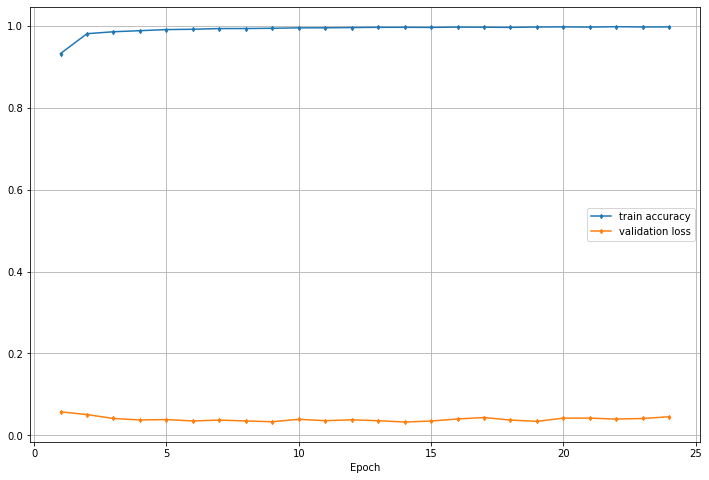

In [13]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc,'d-', ms = 3, label = 'train accuracy')
plt.plot(xs, y_vloss,'d-', ms = 3, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()
